To run this, press "*Runtime*" and press "*Run all*" on a **free** Tesla T4 Google Colab instance!
<div class="align-center">
<a href="https://unsloth.ai/"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
<a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord button.png" width="145"></a>
<a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a></a> Join Discord if you need help + ⭐ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐
</div>

To install Unsloth on your own computer, follow the installation instructions on our Github page [here](https://docs.unsloth.ai/get-started/installing-+-updating).

You will learn how to do [data prep](#Data), how to [train](#Train), how to [run the model](#Inference), & [how to save it](#Save)


### News

**Read our [blog post](https://unsloth.ai/blog/r1-reasoning) for guidance on how to train reasoning models.**

Visit our docs for all our [model uploads](https://docs.unsloth.ai/get-started/all-our-models) and [notebooks](https://docs.unsloth.ai/get-started/unsloth-notebooks).


### Installation

In [1]:
%%capture
import os
if "COLAB_" not in "".join(os.environ.keys()):
    !pip install unsloth
else:
    # Do this only in Colab notebooks! Otherwise use pip install unsloth
    !pip install --no-deps bitsandbytes accelerate xformers==0.0.29 peft trl triton
    !pip install --no-deps cut_cross_entropy unsloth_zoo
    !pip install sentencepiece protobuf datasets huggingface_hub hf_transfer
    !pip install --no-deps unsloth

### Unsloth

In [2]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",      # Llama-3.1 15 trillion tokens model 2x faster!
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",    # We also uploaded 4bit for 405b!
    "unsloth/Mistral-Nemo-Base-2407-bnb-4bit", # New Mistral 12b 2x faster!
    "unsloth/Mistral-Nemo-Instruct-2407-bnb-4bit",
    "unsloth/mistral-7b-v0.3-bnb-4bit",        # Mistral v3 2x faster!
    "unsloth/mistral-7b-instruct-v0.3-bnb-4bit",
    "unsloth/Phi-3.5-mini-instruct",           # Phi-3.5 2x faster!
    "unsloth/Phi-3-medium-4k-instruct",
    "unsloth/gemma-2-9b-bnb-4bit",
    "unsloth/gemma-2-27b-bnb-4bit",            # Gemma 2x faster!
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Meta-Llama-3.1-8B",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.3.8: Fast Llama patching. Transformers: 4.48.3.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.1.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.96G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

We now add LoRA adapters so we only need to update 1 to 10% of all parameters!

In [3]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 16, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    # [NEW] "unsloth" uses 30% less VRAM, fits 2x larger batch sizes!
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)

Unsloth 2025.3.8 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


Showing subset of weights: (16, 200) from original (16, 4096)


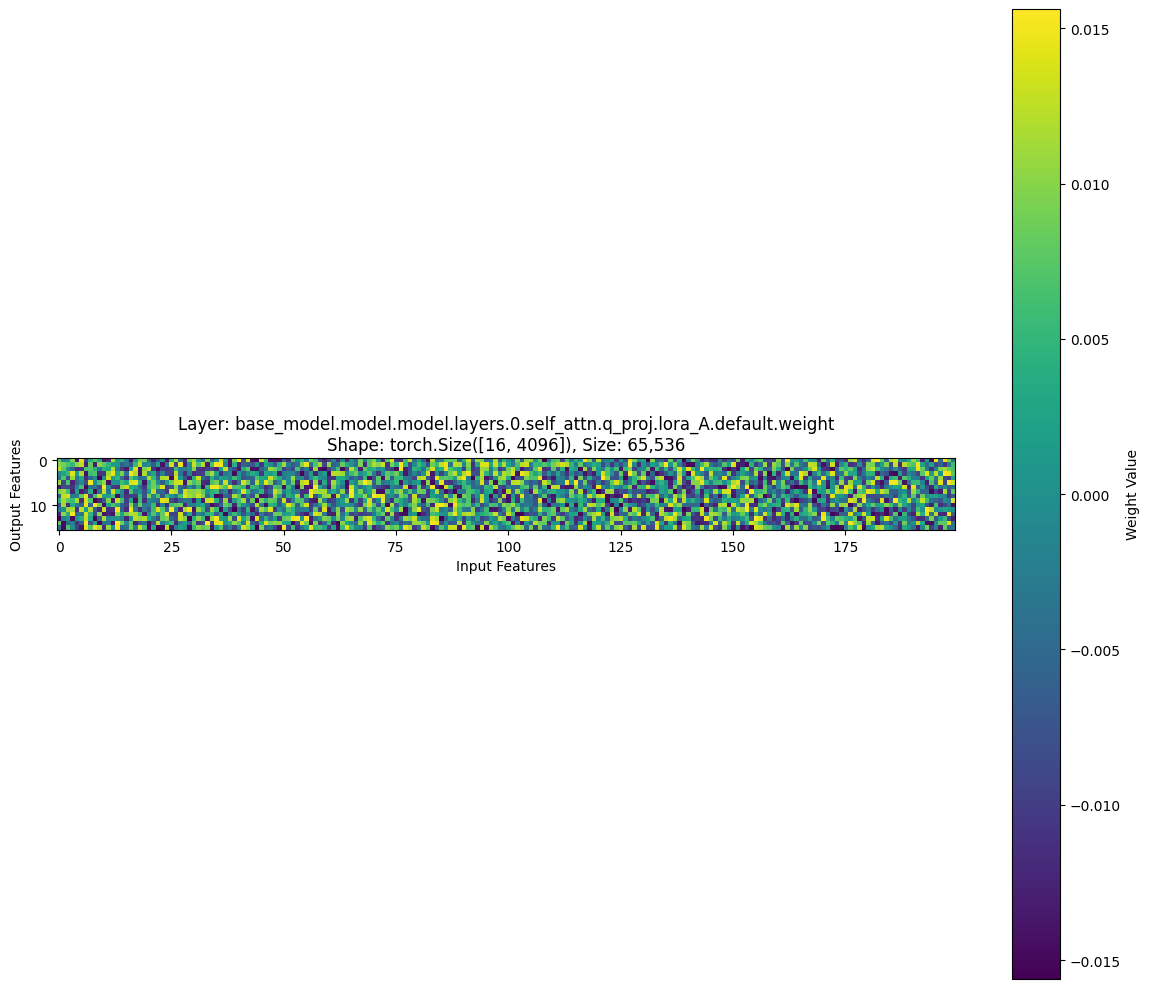

Showing subset of weights: (200, 16) from original (4096, 16)


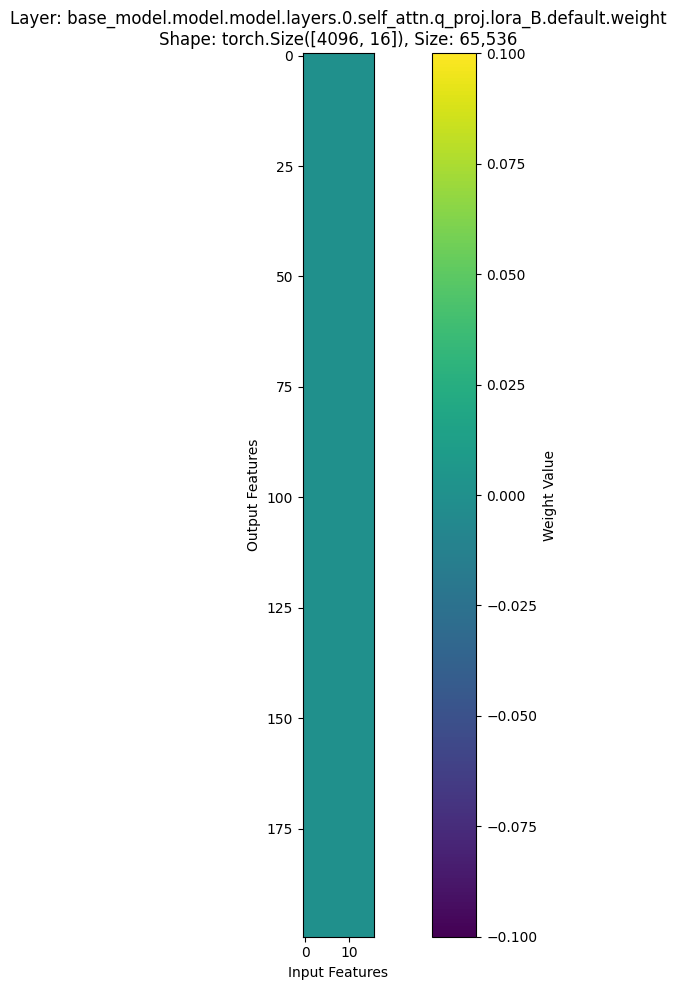

Skipping additional layers matching 'q_proj'
No layers found matching pattern 'k_proj.weight'
No layers found matching pattern 'v_proj.weight'
No layers found matching pattern 'o_proj.weight'
No layers found matching pattern 'gate_proj.weight'
No layers found matching pattern 'up_proj.weight'
No layers found matching pattern 'down_proj.weight'
Layer model.layers.0.self_attn.q_proj.weight not found in model
Showing subset of weights: (200, 200) from original (128256, 4096)


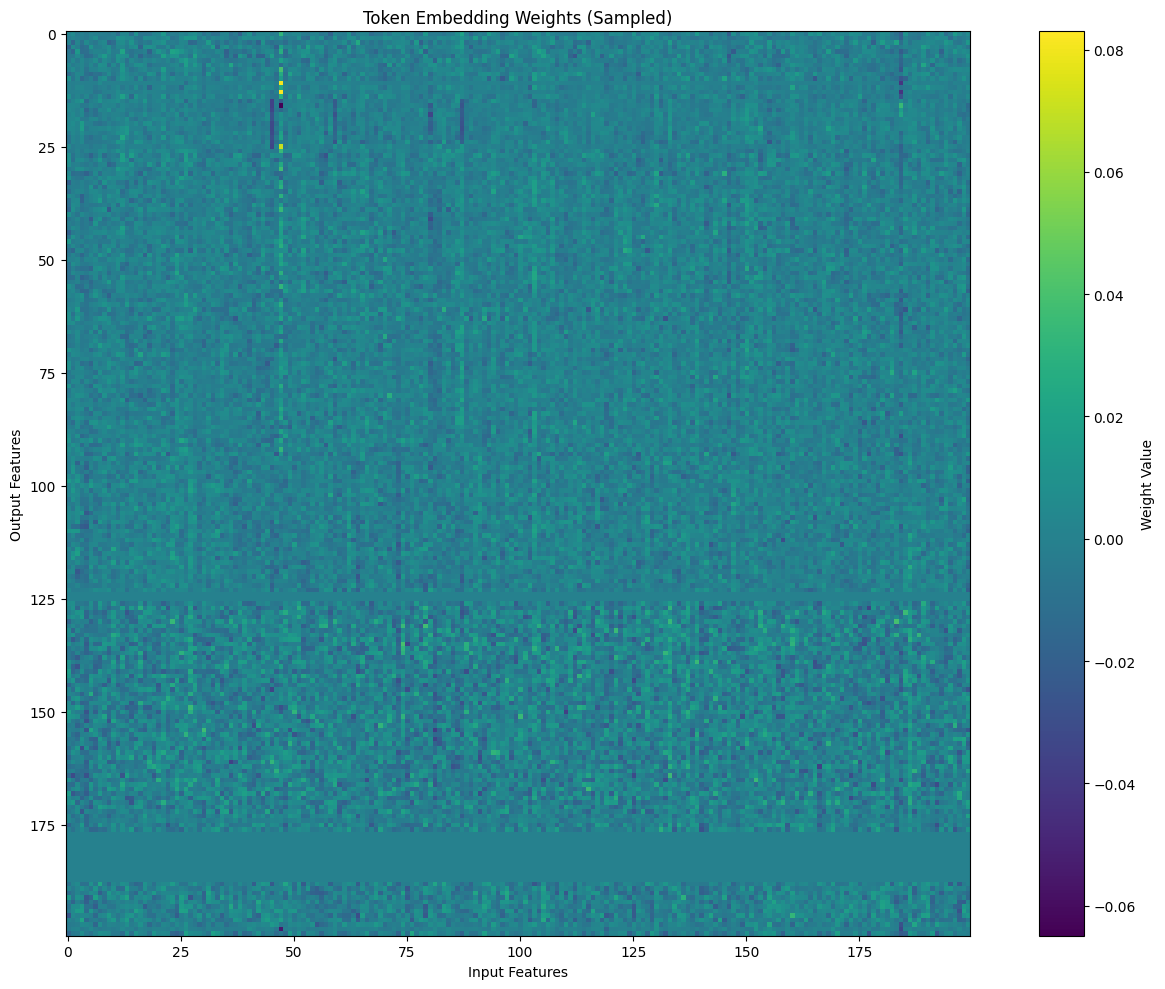

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def visualize_weight_heatmap(model, layer_name, title=None, figsize=(12, 10), cmap="viridis"):
    """
    Create a heatmap visualization of weights from a specified layer.

    Args:
        model: The PyTorch model
        layer_name: Name of the layer to visualize (e.g., "model.layers.0.self_attn.q_proj.weight")
        title: Optional title for the plot
        figsize: Figure size (width, height)
        cmap: Colormap to use
    """
    # Get the weights for the specified layer
    weights = None
    for name, param in model.named_parameters():
        if layer_name in name:
            weights = param.detach().cpu().numpy()
            break

    if weights is None:
        print(f"Layer {layer_name} not found in model")
        return

    # If weights are too large, sample a subset or take the first N values
    max_dim = 200  # Maximum dimension for visualization
    if weights.ndim > 2:
        # For higher dimensional weights, flatten the last dimensions
        orig_shape = weights.shape
        weights = weights.reshape(orig_shape[0], -1)
        print(f"Reshaped weights from {orig_shape} to {weights.shape}")

    if weights.shape[0] > max_dim or weights.shape[1] > max_dim:
        # Sample a subset if too large
        rows = min(weights.shape[0], max_dim)
        cols = min(weights.shape[1], max_dim)
        weights_sample = weights[:rows, :cols]
        print(f"Showing subset of weights: {weights_sample.shape} from original {weights.shape}")
    else:
        weights_sample = weights

    # Create the heatmap
    plt.figure(figsize=figsize)
    im = plt.imshow(weights_sample, cmap=cmap)
    plt.colorbar(im, label="Weight Value")

    if title:
        plt.title(title)
    else:
        plt.title(f"Weights Heatmap: {layer_name}")

    plt.xlabel("Input Features")
    plt.ylabel("Output Features")
    plt.tight_layout()
    plt.show()

def visualize_multiple_layers(model, layer_patterns, max_layers=5):
    """
    Visualize weights from multiple layers matching patterns.

    Args:
        model: The PyTorch model
        layer_patterns: List of patterns to match layer names
        max_layers: Maximum number of layers to visualize per pattern
    """
    for pattern in layer_patterns:
        count = 0
        for name, param in model.named_parameters():
            if pattern in name and param.requires_grad and 'weight' in name:
                if count < max_layers:
                    visualize_weight_heatmap(
                        model,
                        name,
                        title=f"Layer: {name}\nShape: {param.shape}, Size: {param.numel():,}"
                    )
                    count += 1
                else:
                    print(f"Skipping additional layers matching '{pattern}'")
                    break
        if count == 0:
            print(f"No layers found matching pattern '{pattern}'")

# List of layer patterns to visualize
layer_patterns = [
    "q_proj",     # Query projection weights
    "k_proj.weight",     # Key projection weights
    "v_proj.weight",     # Value projection weights
    "o_proj.weight",     # Output projection weights
    "gate_proj.weight",  # Gate projection in MLP
    "up_proj.weight",    # Up projection in MLP
    "down_proj.weight"   # Down projection in MLP
]

# Visualize weights from different layers
visualize_multiple_layers(model, layer_patterns, max_layers=2)

# If you want to visualize a specific layer
# Example: visualize first layer query projection weights
layer_name = "model.layers.0.self_attn.q_proj.weight"
visualize_weight_heatmap(model, layer_name, title="Query Projection Weights (Layer 0)")

# To visualize the embedding weights (typically very large)
visualize_weight_heatmap(
    model,
    "model.embed_tokens.weight",
    title="Token Embedding Weights (Sampled)",
    figsize=(14, 10)
)

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import re
from IPython.display import display, HTML

def list_model_layers(model):
    """List all available layers in the model with weights"""
    layers = []
    for name, param in model.named_parameters():
        if param.requires_grad and len(param.shape) >= 2:  # Only include weight matrices (not biases or scalars)
            layers.append({
                'name': name,
                'shape': tuple(param.shape),
                'size': param.numel()
            })

    # Sort by name for better organization
    return sorted(layers, key=lambda x: x['name'])

def print_layer_groups(layers):
    """Print layers organized by groups"""
    # Group layers by patterns
    groups = {}

    for layer in layers:
        name = layer['name']

        # Extract group name using patterns
        if 'embed' in name:
            group = 'Embeddings'
        elif 'self_attn' in name:
            group = 'Self-Attention'
        elif 'mlp' in name:
            group = 'MLP (Feed Forward)'
        elif 'norm' in name:
            group = 'Normalization'
        else:
            group = 'Other'

        if group not in groups:
            groups[group] = []

        groups[group].append(layer)

    # Print groups
    print("=== MODEL LAYER GROUPS ===")
    for group_name, group_layers in groups.items():
        print(f"\n== {group_name} ==")
        for i, layer in enumerate(group_layers[:5]):  # Show first 5 of each group
            print(f"{i+1}. {layer['name']} - Shape: {layer['shape']}, Params: {layer['size']:,}")

        if len(group_layers) > 5:
            print(f"... and {len(group_layers)-5} more layers in this group")

    return groups

def extract_layer_numbers(layers):
    """Extract and print available layer numbers"""
    layer_numbers = set()
    pattern = re.compile(r'layers\.(\d+)\.')

    for layer in layers:
        match = pattern.search(layer['name'])
        if match:
            layer_numbers.add(int(match.group(1)))

    return sorted(list(layer_numbers))

def get_component_names(model, layer_idx=0):
    """Get available component names for a specific layer"""
    components = []
    pattern = re.compile(f"model\.layers\.{layer_idx}\.(.+?)\.weight")

    for name, _ in model.named_parameters():
        match = pattern.search(name)
        if match:
            components.append(match.group(1))

    return sorted(list(set(components)))

def visualize_weight_heatmap(model, layer_name=None, layer_idx=None, component=None,
                            figsize=(12, 10), cmap="viridis", sample_dim=200):
    """
    Create a heatmap visualization of weights from a specified layer.

    Args:
        model: The PyTorch model
        layer_name: Full name of the layer to visualize (takes precedence if provided)
        layer_idx: Layer index (e.g., 0 for first transformer layer)
        component: Component to visualize (e.g., "q_proj.weight", "k_proj.weight")
        figsize: Figure size (width, height)
        cmap: Colormap to use
        sample_dim: Maximum dimension to sample for visualization
    """
    # If no layer_name is provided, construct it from layer_idx and component
    if layer_name is None and layer_idx is not None and component is not None:
        # Try to construct the layer name
        if 'self_attn' in component:
            layer_name = f"model.layers.{layer_idx}.self_attn.{component}"
        elif 'mlp' in component:
            layer_name = f"model.layers.{layer_idx}.mlp.{component}"
        else:
            layer_name = f"model.layers.{layer_idx}.{component}"

    if layer_name is None:
        print("Error: Either layer_name or both layer_idx and component must be provided")
        return

    # Try finding the exact name or a close match
    matching_params = []
    exact_match = None

    for name, param in model.named_parameters():
        if layer_name == name:
            exact_match = (name, param)
            break
        elif layer_name in name:
            matching_params.append((name, param))

    if exact_match:
        name, weights_tensor = exact_match
    elif matching_params:
        # Use the shortest matching name (most specific match)
        matching_params.sort(key=lambda x: len(x[0]))
        name, weights_tensor = matching_params[0]
        print(f"Using closest match: {name}")
    else:
        print(f"Layer {layer_name} not found in model. Available layers:")
        for i, (name, _) in enumerate(model.named_parameters()):
            if i < 10:  # Only show first 10
                print(f"- {name}")
            elif i == 10:
                print("...")
        return

    # Convert to numpy array
    weights = weights_tensor.detach().cpu().numpy()

    # Calculate statistics
    weight_min = np.min(weights)
    weight_max = np.max(weights)
    weight_mean = np.mean(weights)
    weight_std = np.std(weights)

    # If weights are too large, sample a subset
    if weights.ndim > 2:
        # For higher dimensional weights, flatten the last dimensions
        orig_shape = weights.shape
        weights = weights.reshape(orig_shape[0], -1)
        print(f"Reshaped weights from {orig_shape} to {weights.shape}")

    if weights.shape[0] > sample_dim or weights.shape[1] > sample_dim:
        # Sample a subset if too large
        rows = min(weights.shape[0], sample_dim)
        cols = min(weights.shape[1], sample_dim)
        weights_sample = weights[:rows, :cols]
        print(f"Showing subset of weights: {weights_sample.shape} from original {weights.shape}")
    else:
        weights_sample = weights

    # Create the heatmap
    plt.figure(figsize=figsize)
    im = plt.imshow(weights_sample, cmap=cmap)
    plt.colorbar(im, label="Weight Value")

    # Add statistics to title
    plt.title(f"Weights Heatmap: {name}\nShape: {weights.shape}, Params: {weights.size:,}\n" +
             f"Min: {weight_min:.4f}, Max: {weight_max:.4f}, Mean: {weight_mean:.4f}, Std: {weight_std:.4f}")

    plt.xlabel("Input Features")
    plt.ylabel("Output Features")
    plt.tight_layout()
    plt.show()

    return weights  # Return the weights for potential further analysis

def visualize_weight_distribution(model, layer_name=None, layer_idx=None, component=None,
                                figsize=(10, 6), bins=100):
    """
    Visualize the distribution of weights in a histogram.

    Args:
        model: The PyTorch model
        layer_name, layer_idx, component: Same as in visualize_weight_heatmap
        figsize: Figure size
        bins: Number of histogram bins
    """
    # Reuse code to find the weights tensor
    if layer_name is None and layer_idx is not None and component is not None:
        if 'self_attn' in component:
            layer_name = f"model.layers.{layer_idx}.self_attn.{component}"
        elif 'mlp' in component:
            layer_name = f"model.layers.{layer_idx}.mlp.{component}"
        else:
            layer_name = f"model.layers.{layer_idx}.{component}"

    if layer_name is None:
        print("Error: Either layer_name or both layer_idx and component must be provided")
        return

    found = False
    for name, param in model.named_parameters():
        if layer_name in name:
            weights = param.detach().cpu().numpy().flatten()
            found = True
            break

    if not found:
        print(f"Layer {layer_name} not found")
        return

    # Create histogram
    plt.figure(figsize=figsize)
    plt.hist(weights, bins=bins, alpha=0.7)
    plt.title(f"Weight Distribution: {name}\nShape: {param.shape}, Params: {param.numel():,}")
    plt.xlabel("Weight Value")
    plt.ylabel("Frequency")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

def compare_layer_weights(model, layer_indices, component, figsize=(15, 10), cmap="viridis"):
    """
    Compare weights across different layers for the same component.

    Args:
        model: The PyTorch model
        layer_indices: List of layer indices to compare
        component: Component to visualize (e.g., "self_attn.q_proj.weight")
        figsize: Figure size
        cmap: Colormap
    """
    if not layer_indices:
        print("No layer indices provided")
        return

    if len(layer_indices) > 4:
        print(f"Warning: Comparing {len(layer_indices)} layers might be cluttered. Consider fewer layers.")

    # Set up the figure
    fig, axes = plt.subplots(len(layer_indices), 1, figsize=figsize)
    if len(layer_indices) == 1:
        axes = [axes]  # Make it iterable for a single layer

    vmin, vmax = None, None  # For consistent colormap scaling
    weight_arrays = []

    # First pass to get min/max for consistent colormap
    for idx in layer_indices:
        layer_name = None
        if 'self_attn' in component:
            layer_name = f"model.layers.{idx}.self_attn.{component}"
        elif 'mlp' in component:
            layer_name = f"model.layers.{idx}.mlp.{component}"
        else:
            layer_name = f"model.layers.{idx}.{component}"

        found = False
        for name, param in model.named_parameters():
            if layer_name in name:
                weights = param.detach().cpu().numpy()

                # Handle dimensionality
                if weights.ndim > 2:
                    orig_shape = weights.shape
                    weights = weights.reshape(orig_shape[0], -1)

                # Sample if too large
                if weights.shape[0] > 200 or weights.shape[1] > 200:
                    rows = min(weights.shape[0], 200)
                    cols = min(weights.shape[1], 200)
                    weights = weights[:rows, :cols]

                weight_arrays.append((idx, name, weights))
                found = True

                if vmin is None or weights.min() < vmin:
                    vmin = weights.min()
                if vmax is None or weights.max() > vmax:
                    vmax = weights.max()
                break

        if not found:
            print(f"Layer component not found for layer {idx}")

    # Plot with consistent colormap scaling
    for i, (idx, name, weights) in enumerate(weight_arrays):
        im = axes[i].imshow(weights, cmap=cmap, vmin=vmin, vmax=vmax)
        axes[i].set_title(f"Layer {idx}: {name}\nShape: {weights.shape}")
        axes[i].set_ylabel("Output Features")

    # Add colorbar
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.88, 0.15, 0.03, 0.7])
    fig.colorbar(im, cax=cbar_ax)

    # Add x-label only to the bottom plot
    axes[-1].set_xlabel("Input Features")

    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

def analyze_model_weights(model):
    """Run a complete analysis of the model weights"""
    # Get all layers with weights
    all_layers = list_model_layers(model)
    available_groups = print_layer_groups(all_layers)
    layer_numbers = extract_layer_numbers(all_layers)

    print("\n=== AVAILABLE TRANSFORMER LAYERS ===")
    print(f"Layer numbers: {layer_numbers}")

    # Get components for the first layer
    if layer_numbers:
        first_layer = layer_numbers[0]
        components = get_component_names(model, first_layer)
        print(f"\n=== COMPONENTS IN LAYER {first_layer} ===")
        for comp in components:
            print(f"- {comp}")

    print("\n=== HOW TO VISUALIZE LAYERS ===")
    print("Method 1: Visualize by layer number and component:")
    print("visualize_weight_heatmap(model, layer_idx=0, component='self_attn.q_proj.weight')")
    print("\nMethod 2: Visualize by full layer name:")
    print("visualize_weight_heatmap(model, layer_name='model.layers.0.self_attn.q_proj.weight')")
    print("\nMethod 3: Visualize weight distribution:")
    print("visualize_weight_distribution(model, layer_idx=0, component='self_attn.q_proj.weight')")
    print("\nMethod 4: Compare weights across layers:")
    print("compare_layer_weights(model, layer_indices=[0, 1, 2], component='self_attn.q_proj.weight')")

    # Display interactive selector using HTML (works in Jupyter/Colab)
    display(HTML("""
    <div style="background-color:#f8f9fa; padding:10px; margin:10px 0; border-radius:5px;">
    <p><b>Instructions:</b> Run the analyze_model_weights(model) function first to see available layers and components.
    Then use one of the visualization functions described above to see specific layer weights.</p>
    </div>
    """))

    return {
        'layers': all_layers,
        'groups': available_groups,
        'layer_numbers': layer_numbers
    }

# Example usage:
print("\n=== MODEL WEIGHT ANALYSIS TOOLKIT ===")
print("Run the following function to start analyzing your model:")
print("model_info = analyze_model_weights(model)")

# Example visualization
if 'model' in globals():
    # If this code is being run directly, perform a sample visualization
    print("\n=== EXAMPLE VISUALIZATION ===")
    try:
        # Try to visualize first available layer
        all_layers = list_model_layers(model)
        layer_numbers = extract_layer_numbers(all_layers)
        if layer_numbers:
            # Using the first layer and showing the first attention component
            visualize_weight_heatmap(model, layer_idx=layer_numbers[0], component="self_attn.q_proj.weight")
    except Exception as e:
        print(f"Could not generate example visualization: {e}")
        print("Please run analyze_model_weights(model) to see available layers first")


=== MODEL WEIGHT ANALYSIS TOOLKIT ===
Run the following function to start analyzing your model:
model_info = analyze_model_weights(model)

=== EXAMPLE VISUALIZATION ===
Layer model.layers.0.self_attn.self_attn.q_proj.weight not found in model. Available layers:
- base_model.model.model.embed_tokens.weight
- base_model.model.model.layers.0.self_attn.q_proj.base_layer.weight
- base_model.model.model.layers.0.self_attn.q_proj.lora_A.default.weight
- base_model.model.model.layers.0.self_attn.q_proj.lora_B.default.weight
- base_model.model.model.layers.0.self_attn.k_proj.base_layer.weight
- base_model.model.model.layers.0.self_attn.k_proj.lora_A.default.weight
- base_model.model.model.layers.0.self_attn.k_proj.lora_B.default.weight
- base_model.model.model.layers.0.self_attn.v_proj.base_layer.weight
- base_model.model.model.layers.0.self_attn.v_proj.lora_A.default.weight
- base_model.model.model.layers.0.self_attn.v_proj.lora_B.default.weight
...


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# First: list all available layers in the model
def list_all_layers(model):
    print("=== AVAILABLE LAYERS ===")
    for i, (name, param) in enumerate(model.named_parameters()):
        if param.requires_grad and len(param.shape) >= 2:  # Only list matrices/tensors, not scalars
            print(f"{i}: {name} - Shape: {param.shape}")

# Simple function to plot weight heatmap
def plot_weight_heatmap(model, layer_name, cmap="viridis", figsize=(12, 10)):
    print(f"Trying to plot layer: {layer_name}")

    # Find the layer
    for name, param in model.named_parameters():
        if layer_name in name:
            print(f"Found matching layer: {name}")

            # Get weights
            weights = param.detach().cpu().numpy()

            # Handle high-dimensional tensors
            if weights.ndim > 2:
                original_shape = weights.shape
                weights = weights.reshape(original_shape[0], -1)
                print(f"Reshaped from {original_shape} to {weights.shape}")

            # Sample if too large
            if weights.shape[0] > 200 or weights.shape[1] > 200:
                sample_weights = weights[:min(weights.shape[0], 200),
                                        :min(weights.shape[1], 200)]
                print(f"Showing sample of shape {sample_weights.shape} from {weights.shape}")
            else:
                sample_weights = weights

            # Plot the heatmap
            plt.figure(figsize=figsize)
            plt.imshow(sample_weights, cmap=cmap)
            plt.colorbar(label="Weight Value")
            plt.title(f"Weight Heatmap: {name}\nShape: {weights.shape}")
            plt.xlabel("Input Features")
            plt.ylabel("Output Features")
            plt.tight_layout()
            plt.show()
            return

    print(f"Layer '{layer_name}' not found. Please check the layer name.")

list_all_layers(model)
plot_weight_heatmap(model, "base_model.model.model.layers.0")

=== AVAILABLE LAYERS ===
2: base_model.model.model.layers.0.self_attn.q_proj.lora_A.default.weight - Shape: torch.Size([16, 4096])
3: base_model.model.model.layers.0.self_attn.q_proj.lora_B.default.weight - Shape: torch.Size([4096, 16])
5: base_model.model.model.layers.0.self_attn.k_proj.lora_A.default.weight - Shape: torch.Size([16, 4096])
6: base_model.model.model.layers.0.self_attn.k_proj.lora_B.default.weight - Shape: torch.Size([1024, 16])
8: base_model.model.model.layers.0.self_attn.v_proj.lora_A.default.weight - Shape: torch.Size([16, 4096])
9: base_model.model.model.layers.0.self_attn.v_proj.lora_B.default.weight - Shape: torch.Size([1024, 16])
11: base_model.model.model.layers.0.self_attn.o_proj.lora_A.default.weight - Shape: torch.Size([16, 4096])
12: base_model.model.model.layers.0.self_attn.o_proj.lora_B.default.weight - Shape: torch.Size([4096, 16])
14: base_model.model.model.layers.0.mlp.gate_proj.lora_A.default.weight - Shape: torch.Size([16, 4096])
15: base_model.model.

Trying to plot layer: base_model.model.model.layers.21.mlp.down_proj.lora_A.default.weight
Found matching layer: base_model.model.model.layers.21.mlp.down_proj.lora_A.default.weight
Showing sample of shape (16, 200) from (16, 14336)


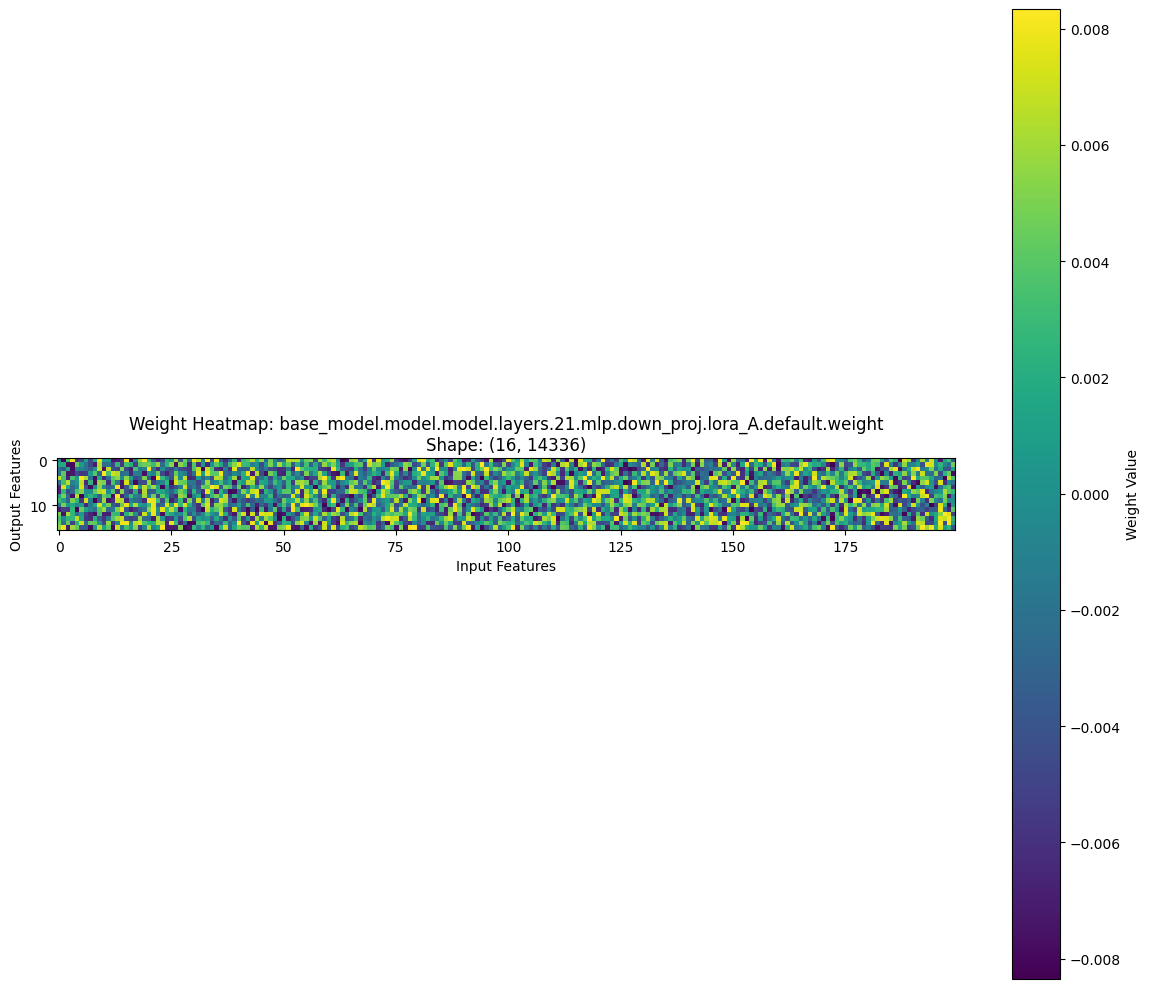

In [16]:
plot_weight_heatmap(model, "base_model.model.model.layers.21.mlp.down_proj.lora_A.default.weight")

No layers found matching pattern 'q_proj.weight'
No layers found matching pattern 'k_proj.weight'
No layers found matching pattern 'v_proj.weight'
No layers found matching pattern 'o_proj.weight'
No layers found matching pattern 'gate_proj.weight'
No layers found matching pattern 'up_proj.weight'
No layers found matching pattern 'down_proj.weight'
Layer model.layers.0.self_attn.q_proj.weight not found in model
Showing subset of weights: (200, 200) from original (128256, 4096)


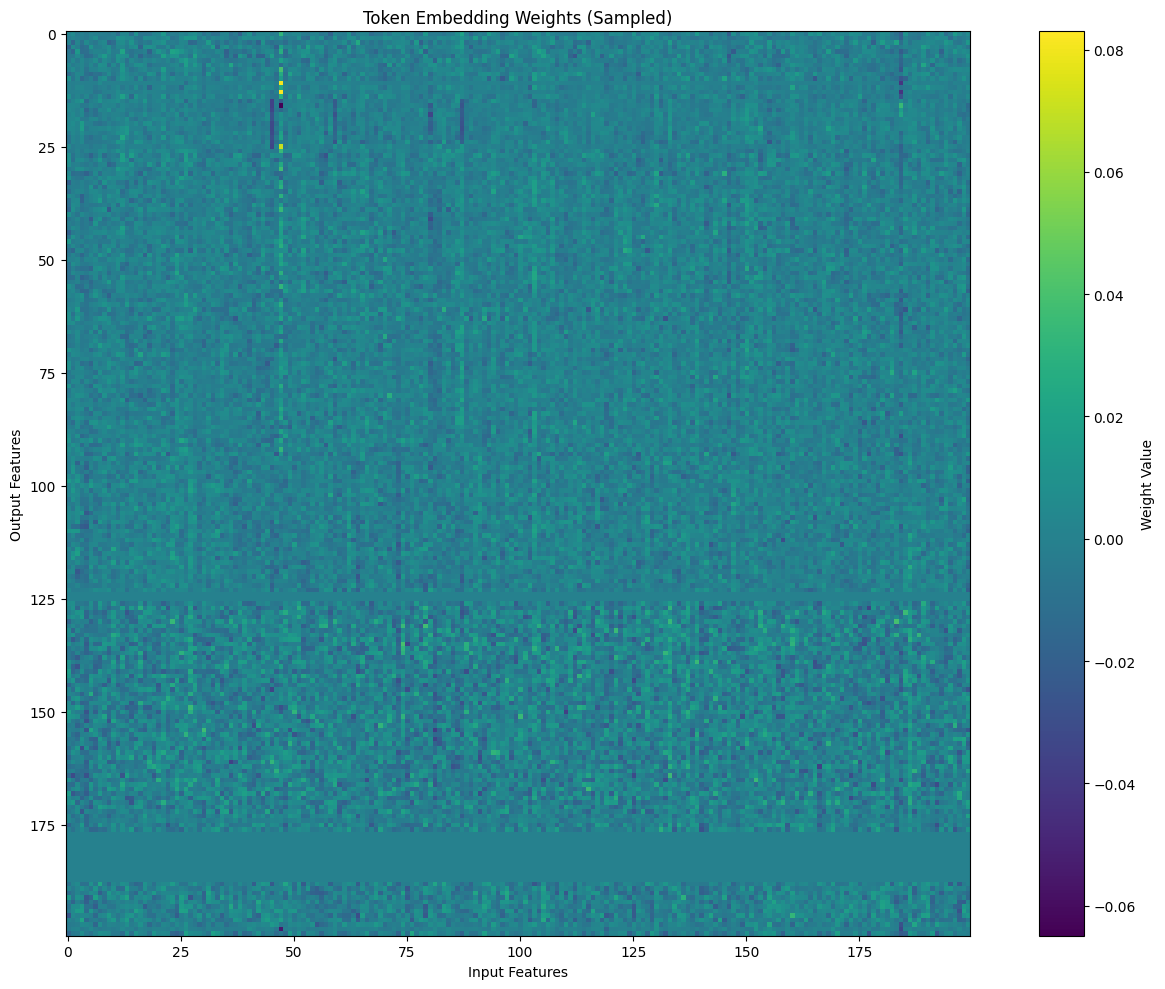

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def visualize_weight_heatmap(model, layer_name, title=None, figsize=(12, 10), cmap="viridis"):
    """
    Create a heatmap visualization of weights from a specified layer.

    Args:
        model: The PyTorch model
        layer_name: Name of the layer to visualize (e.g., "model.layers.0.self_attn.q_proj.weight")
        title: Optional title for the plot
        figsize: Figure size (width, height)
        cmap: Colormap to use
    """
    # Get the weights for the specified layer
    weights = None
    for name, param in model.named_parameters():
        if layer_name in name:
            weights = param.detach().cpu().numpy()
            break

    if weights is None:
        print(f"Layer {layer_name} not found in model")
        return

    # If weights are too large, sample a subset or take the first N values
    max_dim = 200  # Maximum dimension for visualization
    if weights.ndim > 2:
        # For higher dimensional weights, flatten the last dimensions
        orig_shape = weights.shape
        weights = weights.reshape(orig_shape[0], -1)
        print(f"Reshaped weights from {orig_shape} to {weights.shape}")

    if weights.shape[0] > max_dim or weights.shape[1] > max_dim:
        # Sample a subset if too large
        rows = min(weights.shape[0], max_dim)
        cols = min(weights.shape[1], max_dim)
        weights_sample = weights[:rows, :cols]
        print(f"Showing subset of weights: {weights_sample.shape} from original {weights.shape}")
    else:
        weights_sample = weights

    # Create the heatmap
    plt.figure(figsize=figsize)
    im = plt.imshow(weights_sample, cmap=cmap)
    plt.colorbar(im, label="Weight Value")

    if title:
        plt.title(title)
    else:
        plt.title(f"Weights Heatmap: {layer_name}")

    plt.xlabel("Input Features")
    plt.ylabel("Output Features")
    plt.tight_layout()
    plt.show()

def visualize_multiple_layers(model, layer_patterns, max_layers=5):
    """
    Visualize weights from multiple layers matching patterns.

    Args:
        model: The PyTorch model
        layer_patterns: List of patterns to match layer names
        max_layers: Maximum number of layers to visualize per pattern
    """
    for pattern in layer_patterns:
        count = 0
        for name, param in model.named_parameters():
            if pattern in name and param.requires_grad and 'weight' in name:
                if count < max_layers:
                    visualize_weight_heatmap(
                        model,
                        name,
                        title=f"Layer: {name}\nShape: {param.shape}, Size: {param.numel():,}"
                    )
                    count += 1
                else:
                    print(f"Skipping additional layers matching '{pattern}'")
                    break
        if count == 0:
            print(f"No layers found matching pattern '{pattern}'")

# List of layer patterns to visualize
layer_patterns = [
    "q_proj.weight",     # Query projection weights
    "k_proj.weight",     # Key projection weights
    "v_proj.weight",     # Value projection weights
    "o_proj.weight",     # Output projection weights
    "gate_proj.weight",  # Gate projection in MLP
    "up_proj.weight",    # Up projection in MLP
    "down_proj.weight"   # Down projection in MLP
]

# Visualize weights from different layers
visualize_multiple_layers(model, layer_patterns, max_layers=2)

# If you want to visualize a specific layer
# Example: visualize first layer query projection weights
layer_name = "model.layers.0.self_attn.q_proj.weight"
visualize_weight_heatmap(model, layer_name, title="Query Projection Weights (Layer 0)")

# To visualize the embedding weights (typically very large)
visualize_weight_heatmap(
    model,
    "model.embed_tokens.weight",
    title="Token Embedding Weights (Sampled)",
    figsize=(14, 10)
)

<a name="Data"></a>
### Data Prep
We now use the Alpaca dataset from [yahma](https://huggingface.co/datasets/yahma/alpaca-cleaned), which is a filtered version of 52K of the original [Alpaca dataset](https://crfm.stanford.edu/2023/03/13/alpaca.html). You can replace this code section with your own data prep.

**[NOTE]** To train only on completions (ignoring the user's input) read TRL's docs [here](https://huggingface.co/docs/trl/sft_trainer#train-on-completions-only).

**[NOTE]** Remember to add the **EOS_TOKEN** to the tokenized output!! Otherwise you'll get infinite generations!

If you want to use the `llama-3` template for ShareGPT datasets, try our conversational [notebook](https://colab.research.google.com/drive/1XamvWYinY6FOSX9GLvnqSjjsNflxdhNc?usp=sharing).

For text completions like novel writing, try this [notebook](https://colab.research.google.com/drive/1ef-tab5bhkvWmBOObepl1WgJvfvSzn5Q?usp=sharing).

In [4]:
alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{}

### Input:
{}

### Response:
{}"""

EOS_TOKEN = tokenizer.eos_token # Must add EOS_TOKEN
def formatting_prompts_func(examples):
    instructions = examples["instruction"]
    inputs       = examples["input"]
    outputs      = examples["output"]
    texts = []
    for instruction, input, output in zip(instructions, inputs, outputs):
        # Must add EOS_TOKEN, otherwise your generation will go on forever!
        text = alpaca_prompt.format(instruction, input, output) + EOS_TOKEN
        texts.append(text)
    return { "text" : texts, }
pass

from datasets import load_dataset
dataset = load_dataset("yahma/alpaca-cleaned", split = "train")
dataset = dataset.map(formatting_prompts_func, batched = True,)

README.md:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

alpaca_data_cleaned.json:   0%|          | 0.00/44.3M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/51760 [00:00<?, ? examples/s]

Map:   0%|          | 0/51760 [00:00<?, ? examples/s]

<a name="Train"></a>
### Train the model
Now let's use Huggingface TRL's `SFTTrainer`! More docs here: [TRL SFT docs](https://huggingface.co/docs/trl/sft_trainer). We do 60 steps to speed things up, but you can set `num_train_epochs=1` for a full run, and turn off `max_steps=None`. We also support TRL's `DPOTrainer`!

In [5]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 2,
    packing = False, # Can make training 5x faster for short sequences.
    args = TrainingArguments(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        # num_train_epochs = 1, # Set this for 1 full training run.
        max_steps = 60,
        learning_rate = 2e-4,
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none", # Use this for WandB etc
    ),
)

Tokenizing to ["text"] (num_proc=2):   0%|          | 0/51760 [00:00<?, ? examples/s]

In [ ]:
# @title Show current memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = Tesla T4. Max memory = 14.748 GB.
5.984 GB of memory reserved.


In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 51,760 | Num Epochs = 1
O^O/ \_/ \    Batch size per device = 2 | Gradient Accumulation steps = 4
\        /    Total batch size = 8 | Total steps = 60
 "-____-"     Number of trainable parameters = 41,943,040


Step,Training Loss
1,1.817600
2,2.304200
3,1.689300
4,1.938200
5,1.656900
6,1.621900
7,1.187100
8,1.264200
9,1.101200
10,1.189500


In [ ]:
# @title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory / max_memory * 100, 3)
lora_percentage = round(used_memory_for_lora / max_memory * 100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(
    f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training."
)
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

462.7198 seconds used for training.
7.71 minutes used for training.
Peak reserved memory = 7.922 GB.
Peak reserved memory for training = 1.938 GB.
Peak reserved memory % of max memory = 53.716 %.
Peak reserved memory for training % of max memory = 13.141 %.


<a name="Inference"></a>
### Inference
Let's run the model! You can change the instruction and input - leave the output blank!

**[NEW] Try 2x faster inference in a free Colab for Llama-3.1 8b Instruct [here](https://colab.research.google.com/drive/1T-YBVfnphoVc8E2E854qF3jdia2Ll2W2?usp=sharing)**

In [ ]:
# alpaca_prompt = Copied from above
FastLanguageModel.for_inference(model) # Enable native 2x faster inference
inputs = tokenizer(
[
    alpaca_prompt.format(
        "Continue the fibonnaci sequence.", # instruction
        "1, 1, 2, 3, 5, 8", # input
        "", # output - leave this blank for generation!
    )
], return_tensors = "pt").to("cuda")

outputs = model.generate(**inputs, max_new_tokens = 64, use_cache = True)
tokenizer.batch_decode(outputs)

['<|begin_of_text|>Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.\n\n### Instruction:\nContinue the fibonnaci sequence.\n\n### Input:\n1, 1, 2, 3, 5, 8\n\n### Response:\n13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025']

 You can also use a `TextStreamer` for continuous inference - so you can see the generation token by token, instead of waiting the whole time!

In [ ]:
# alpaca_prompt = Copied from above
FastLanguageModel.for_inference(model) # Enable native 2x faster inference
inputs = tokenizer(
[
    alpaca_prompt.format(
        "Continue the fibonnaci sequence.", # instruction
        "1, 1, 2, 3, 5, 8", # input
        "", # output - leave this blank for generation!
    )
], return_tensors = "pt").to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128)

<|begin_of_text|>Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Continue the fibonnaci sequence.

### Input:
1, 1, 2, 3, 5, 8

### Response:
13, 21, 34, 55, 89, 144<|end_of_text|>


<a name="Save"></a>
### Saving, loading finetuned models
To save the final model as LoRA adapters, either use Huggingface's `push_to_hub` for an online save or `save_pretrained` for a local save.

**[NOTE]** This ONLY saves the LoRA adapters, and not the full model. To save to 16bit or GGUF, scroll down!

In [ ]:
model.save_pretrained("lora_model")  # Local saving
tokenizer.save_pretrained("lora_model")
# model.push_to_hub("your_name/lora_model", token = "...") # Online saving
# tokenizer.push_to_hub("your_name/lora_model", token = "...") # Online saving

('lora_model/tokenizer_config.json',
 'lora_model/special_tokens_map.json',
 'lora_model/tokenizer.json')

Now if you want to load the LoRA adapters we just saved for inference, set `False` to `True`:

In [ ]:
if False:
    from unsloth import FastLanguageModel
    model, tokenizer = FastLanguageModel.from_pretrained(
        model_name = "lora_model", # YOUR MODEL YOU USED FOR TRAINING
        max_seq_length = max_seq_length,
        dtype = dtype,
        load_in_4bit = load_in_4bit,
    )
    FastLanguageModel.for_inference(model) # Enable native 2x faster inference

# alpaca_prompt = You MUST copy from above!

inputs = tokenizer(
[
    alpaca_prompt.format(
        "What is a famous tall tower in Paris?", # instruction
        "", # input
        "", # output - leave this blank for generation!
    )
], return_tensors = "pt").to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128)

<|begin_of_text|>Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
What is a famous tall tower in Paris?

### Input:


### Response:
One of the most famous and iconic tall towers in Paris is the Eiffel Tower. Standing at 324 meters (1,063 feet) tall, this wrought iron tower is a symbol of the city and a must-see attraction for tourists from all over the world.<|end_of_text|>


You can also use Hugging Face's `AutoModelForPeftCausalLM`. Only use this if you do not have `unsloth` installed. It can be hopelessly slow, since `4bit` model downloading is not supported, and Unsloth's **inference is 2x faster**.

In [ ]:
if False:
    # I highly do NOT suggest - use Unsloth if possible
    from peft import AutoPeftModelForCausalLM
    from transformers import AutoTokenizer
    model = AutoPeftModelForCausalLM.from_pretrained(
        "lora_model", # YOUR MODEL YOU USED FOR TRAINING
        load_in_4bit = load_in_4bit,
    )
    tokenizer = AutoTokenizer.from_pretrained("lora_model")

### Saving to float16 for VLLM

We also support saving to `float16` directly. Select `merged_16bit` for float16 or `merged_4bit` for int4. We also allow `lora` adapters as a fallback. Use `push_to_hub_merged` to upload to your Hugging Face account! You can go to https://huggingface.co/settings/tokens for your personal tokens.

In [ ]:
# Merge to 16bit
if False: model.save_pretrained_merged("model", tokenizer, save_method = "merged_16bit",)
if False: model.push_to_hub_merged("hf/model", tokenizer, save_method = "merged_16bit", token = "")

# Merge to 4bit
if False: model.save_pretrained_merged("model", tokenizer, save_method = "merged_4bit",)
if False: model.push_to_hub_merged("hf/model", tokenizer, save_method = "merged_4bit", token = "")

# Just LoRA adapters
if False: model.save_pretrained_merged("model", tokenizer, save_method = "lora",)
if False: model.push_to_hub_merged("hf/model", tokenizer, save_method = "lora", token = "")

### GGUF / llama.cpp Conversion
To save to `GGUF` / `llama.cpp`, we support it natively now! We clone `llama.cpp` and we default save it to `q8_0`. We allow all methods like `q4_k_m`. Use `save_pretrained_gguf` for local saving and `push_to_hub_gguf` for uploading to HF.

Some supported quant methods (full list on our [Wiki page](https://github.com/unslothai/unsloth/wiki#gguf-quantization-options)):
* `q8_0` - Fast conversion. High resource use, but generally acceptable.
* `q4_k_m` - Recommended. Uses Q6_K for half of the attention.wv and feed_forward.w2 tensors, else Q4_K.
* `q5_k_m` - Recommended. Uses Q6_K for half of the attention.wv and feed_forward.w2 tensors, else Q5_K.

[**NEW**] To finetune and auto export to Ollama, try our [Ollama notebook](https://colab.research.google.com/drive/1WZDi7APtQ9VsvOrQSSC5DDtxq159j8iZ?usp=sharing)

In [ ]:
# Save to 8bit Q8_0
if False: model.save_pretrained_gguf("model", tokenizer,)
# Remember to go to https://huggingface.co/settings/tokens for a token!
# And change hf to your username!
if False: model.push_to_hub_gguf("hf/model", tokenizer, token = "")

# Save to 16bit GGUF
if False: model.save_pretrained_gguf("model", tokenizer, quantization_method = "f16")
if False: model.push_to_hub_gguf("hf/model", tokenizer, quantization_method = "f16", token = "")

# Save to q4_k_m GGUF
if False: model.save_pretrained_gguf("model", tokenizer, quantization_method = "q4_k_m")
if False: model.push_to_hub_gguf("hf/model", tokenizer, quantization_method = "q4_k_m", token = "")

# Save to multiple GGUF options - much faster if you want multiple!
if False:
    model.push_to_hub_gguf(
        "hf/model", # Change hf to your username!
        tokenizer,
        quantization_method = ["q4_k_m", "q8_0", "q5_k_m",],
        token = "",
    )

Now, use the `model-unsloth.gguf` file or `model-unsloth-Q4_K_M.gguf` file in llama.cpp or a UI based system like Jan or Open WebUI. You can install Jan [here](https://github.com/janhq/jan) and Open WebUI [here](https://github.com/open-webui/open-webui)

And we're done! If you have any questions on Unsloth, we have a [Discord](https://discord.gg/unsloth) channel! If you find any bugs or want to keep updated with the latest LLM stuff, or need help, join projects etc, feel free to join our Discord!

Some other links:
1. Llama 3.2 Conversational notebook. [Free Colab](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.2_(1B_and_3B)-Conversational.ipynb)
2. Saving finetunes to Ollama. [Free notebook](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3_(8B)-Ollama.ipynb)
3. Llama 3.2 Vision finetuning - Radiography use case. [Free Colab](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.2_(11B)-Vision.ipynb)
6. See notebooks for DPO, ORPO, Continued pretraining, conversational finetuning and more on our [documentation](https://docs.unsloth.ai/get-started/unsloth-notebooks)!

<div class="align-center">
  <a href="https://unsloth.ai"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
  <a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord.png" width="145"></a>
  <a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a>

  Join Discord if you need help + ⭐️ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐️
</div>
